X variable

    sepal-length  sepal-width  petal-length  petal-width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
Data visualization



Pie chart comparison



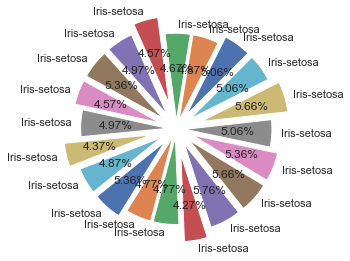

Count plots


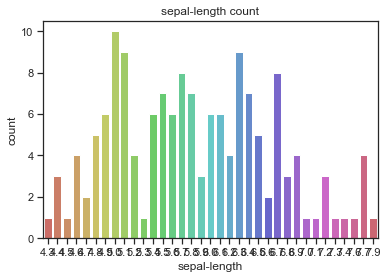

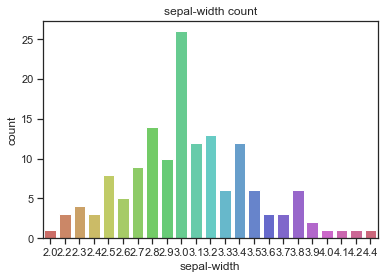

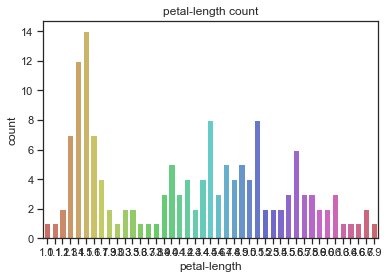

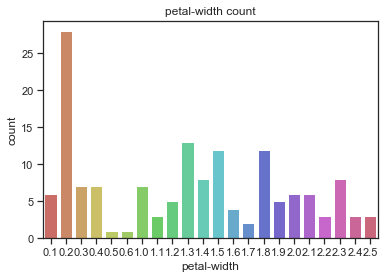





Hypothesis Testing

Mann-Whiteney Test results
Statistics: 2.5 
 p-value: 4.89868480774315e-51
Different distribution (reject H0 and accepting H1)


Wilcoxson Test Results
Statistics: 0.0 
 p-value: 2.244265490032842e-26
Different distribution (reject H0 and accepting H1)


Support Vector Machine Results

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]


Accuracy score: 1.0
score of train data 0.98
score of test data 1.0


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import ttest_ind,mannwhitneyu,wilcoxon
import seaborn as sns
sns.set(style='ticks',color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

#load data set URL
url = "iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 
        'class']
data = pd.read_csv(url, names=names)

df = pd.DataFrame(data)

X = df.drop('class',1)

print('X variable\n\n',X.head())

y = df['class']

#Pie chart
print('Data visualization\n')
def piechart(data):
    df1 = data[:20]
    explode=(0.2,0.1,0.1,0.3,0.2,0.2,0.2,0.1,0.3,0.2,0.2,
             0.1,0.1,0.3,0.2,
             0.2,0.2,0.1,0.3,0.2)
    print('Pie chart comparison\n')
    plt.pie(df1['sepal-length'], labels = df1['class']
            ,explode = explode,
            startangle=45, autopct='%.2f%%')
    plt.show()
print('\n')
piechart(data)

#Count plot
print('Count plots')
sns.countplot(x=df['sepal-length'],data=df, palette='hls')
plt.title('sepal-length count')
plt.show()
print('\n')

sns.countplot(x=df['sepal-width'],data=df, palette='hls')
plt.title('sepal-width count')
plt.show()
print('\n')

sns.countplot(x=df['petal-length'],data=df, palette='hls')
plt.title('petal-length count')
plt.show()
print('\n')

sns.countplot(x=df['petal-width'],data=df, palette='hls')
plt.title('petal-width count')
plt.show()
print('\n')

#Hypothesis
#Non parametric test(mann Whiteney test)
print('\n')
print('Hypothesis Testing\n')
print('Mann-Whiteney Test results')
data1 = df['sepal-length']
data2 = df['sepal-width']
stat, p = mannwhitneyu(data1, data2)
print('Statistics:',stat,'\n','p-value:',p)
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0 and accepting H1)')

#Wilcoxon test
print('\n')
print('Wilcoxson Test Results')
data1 = df['petal-length']
data2 = df['petal-width']
stat1, p1 = wilcoxon(data1, data2)
print('Statistics:',stat1,'\n','p-value:',p1)
# interpret the results
alpha = 0.05
if p1 > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0 and accepting H1)')
    print('\n')

#Split the data train and test
print('Support Vector Machine Results\n')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=23)
#Support Vector machine classifier

svclassifier = SVC(kernel='linear')

#fit the model
svclassifier.fit(X_train, y_train)

#predict the test data
y_pred = svclassifier.predict(X_test)

#evaluating the algorithm

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n')
a = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:',round(a,2))

train = svclassifier.score(X_train, y_train)
print('score of train data',round(train,2))

test = svclassifier.score(X_test, y_test)
print('score of test data',round(test,2))